In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.svm import SVC


# Reading in data into a dataframe
data = pd.read_csv('/content/sample_data/Covid Dataset.csv')

# Displaying the top of the dataframe
print(data.head())

print(data.shape)
print(data.columns)

  Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1           

In [ ]:
# See the column data types and non-missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
# Statistics for each column
print(data.describe().T)

                                        count unique  top  freq
Breathing Problem                        5434      2  Yes  3620
Fever                                    5434      2  Yes  4273
Dry Cough                                5434      2  Yes  4307
Sore throat                              5434      2  Yes  3953
Running Nose                             5434      2  Yes  2952
Asthma                                   5434      2   No  2920
Chronic Lung Disease                     5434      2   No  2869
Headache                                 5434      2  Yes  2736
Heart Disease                            5434      2   No  2911
Diabetes                                 5434      2   No  2846
Hyper Tension                            5434      2   No  2771
Fatigue                                  5434      2  Yes  2821
Gastrointestinal                         5434      2   No  2883
Abroad travel                            5434      2   No  2983
Contact with COVID Patient              

In [ ]:
# Calculating descriptive statistics for categorical data: Counting the frequency of "Yes" and "No" responses for each column
descriptive_stats = data.apply(pd.Series.value_counts).T
# Replacing NaNs with 0 if exists,  for better readability
descriptive_stats.fillna(0, inplace=True)
print(descriptive_stats)

                                             No     Yes
Breathing Problem                        1814.0  3620.0
Fever                                    1161.0  4273.0
Dry Cough                                1127.0  4307.0
Sore throat                              1481.0  3953.0
Running Nose                             2482.0  2952.0
Asthma                                   2920.0  2514.0
Chronic Lung Disease                     2869.0  2565.0
Headache                                 2698.0  2736.0
Heart Disease                            2911.0  2523.0
Diabetes                                 2846.0  2588.0
Hyper Tension                            2771.0  2663.0
Fatigue                                  2613.0  2821.0
Gastrointestinal                         2883.0  2551.0
Abroad travel                            2983.0  2451.0
Contact with COVID Patient               2708.0  2726.0
Attended Large Gathering                 2924.0  2510.0
Visited Public Exposed Places            2614.0 

In [ ]:
# Table of missing data if exists
missing_values = data.isnull().sum()
value = {
    'missing_values': missing_values,
}
frame = pd.DataFrame(value)
print(frame)


                                         missing_values
Breathing Problem                                     0
Fever                                                 0
Dry Cough                                             0
Sore throat                                           0
Running Nose                                          0
Asthma                                                0
Chronic Lung Disease                                  0
Headache                                              0
Heart Disease                                         0
Diabetes                                              0
Hyper Tension                                         0
Fatigue                                               0
Gastrointestinal                                      0
Abroad travel                                         0
Contact with COVID Patient                            0
Attended Large Gathering                              0
Visited Public Exposed Places                   

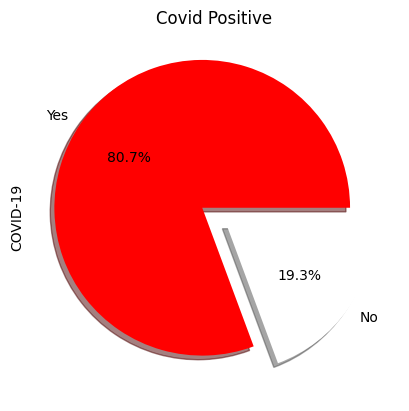

In [ ]:
# Visualization of y  - target column -
data["COVID-19"].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, colors=['red', 'white'])
plt.title('Covid Positive')
plt.show()

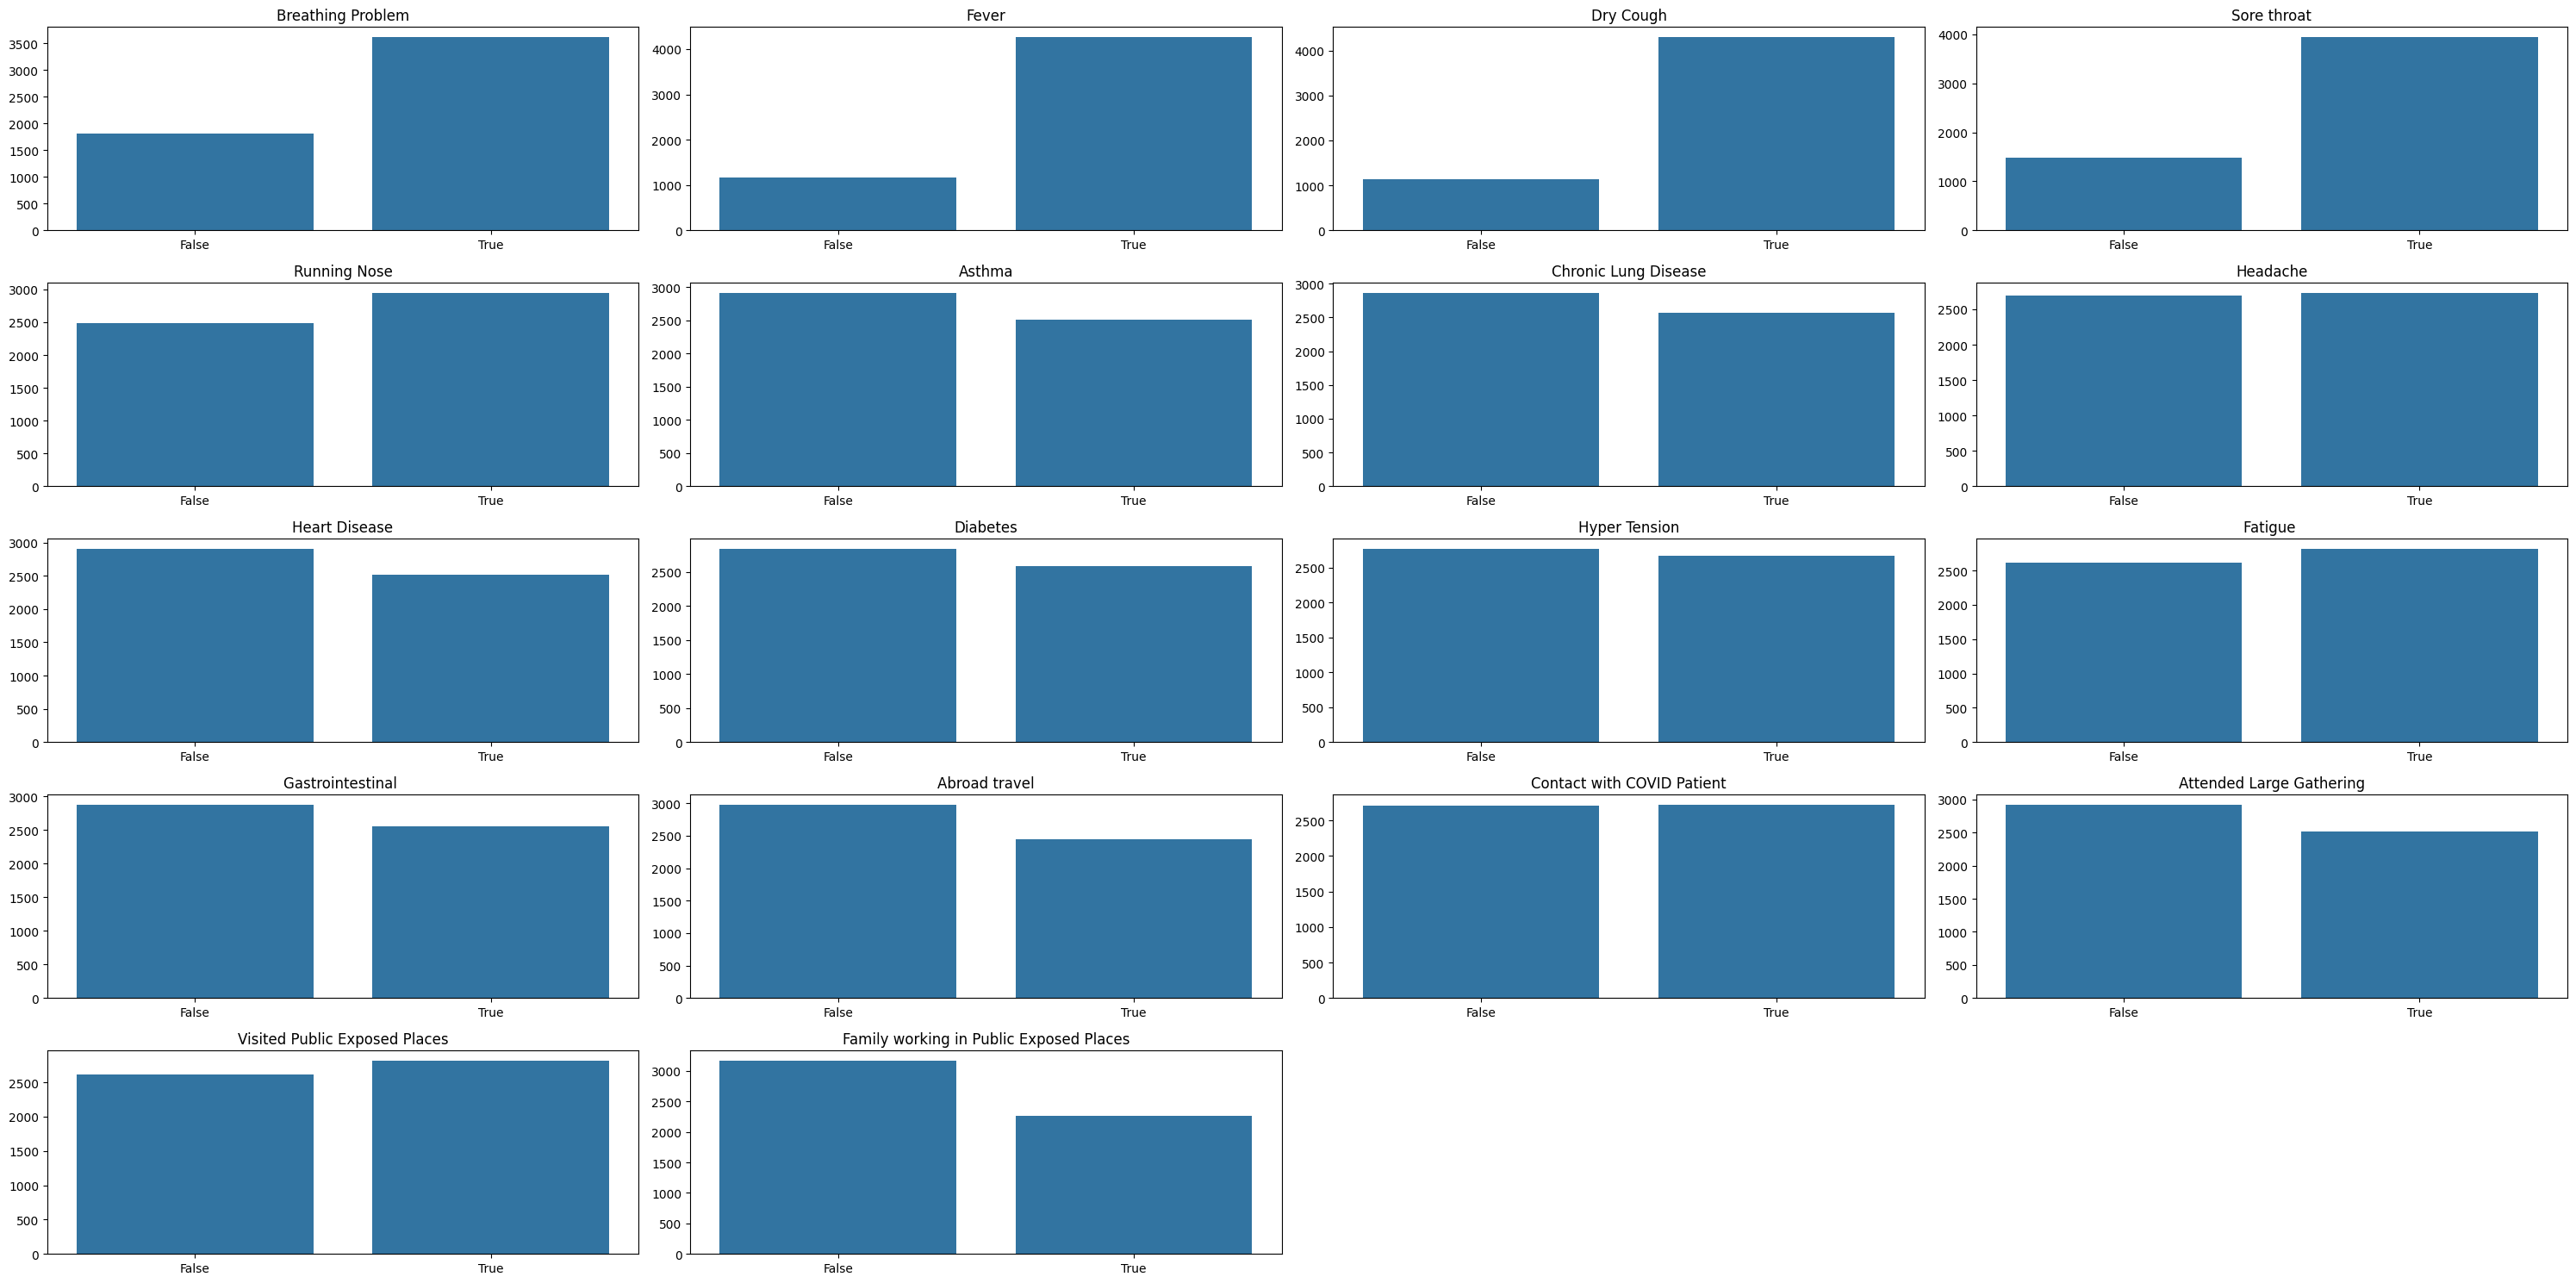

In [ ]:
# Converting "Yes" and "No" to boolean for easier comparison
covid_data_bool = data.replace({'Yes': True, 'No': False})

# Dropping the 'Wearing Masks' and 'Sanitization from Market' columns as they have no variation
covid_data_bool.drop(['Wearing Masks', 'Sanitization from Market'], axis=1, inplace=True)

# Setting up the plot
plt.figure(figsize=(30, 15))

# Plotting each symptom/condition in a subplot
for i, column in enumerate(covid_data_bool.columns[:-1]):  # Excluding the 'COVID-19' column
    plt.subplot(5, 4, i + 1)
    sns.countplot(data=covid_data_bool, x=column)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()


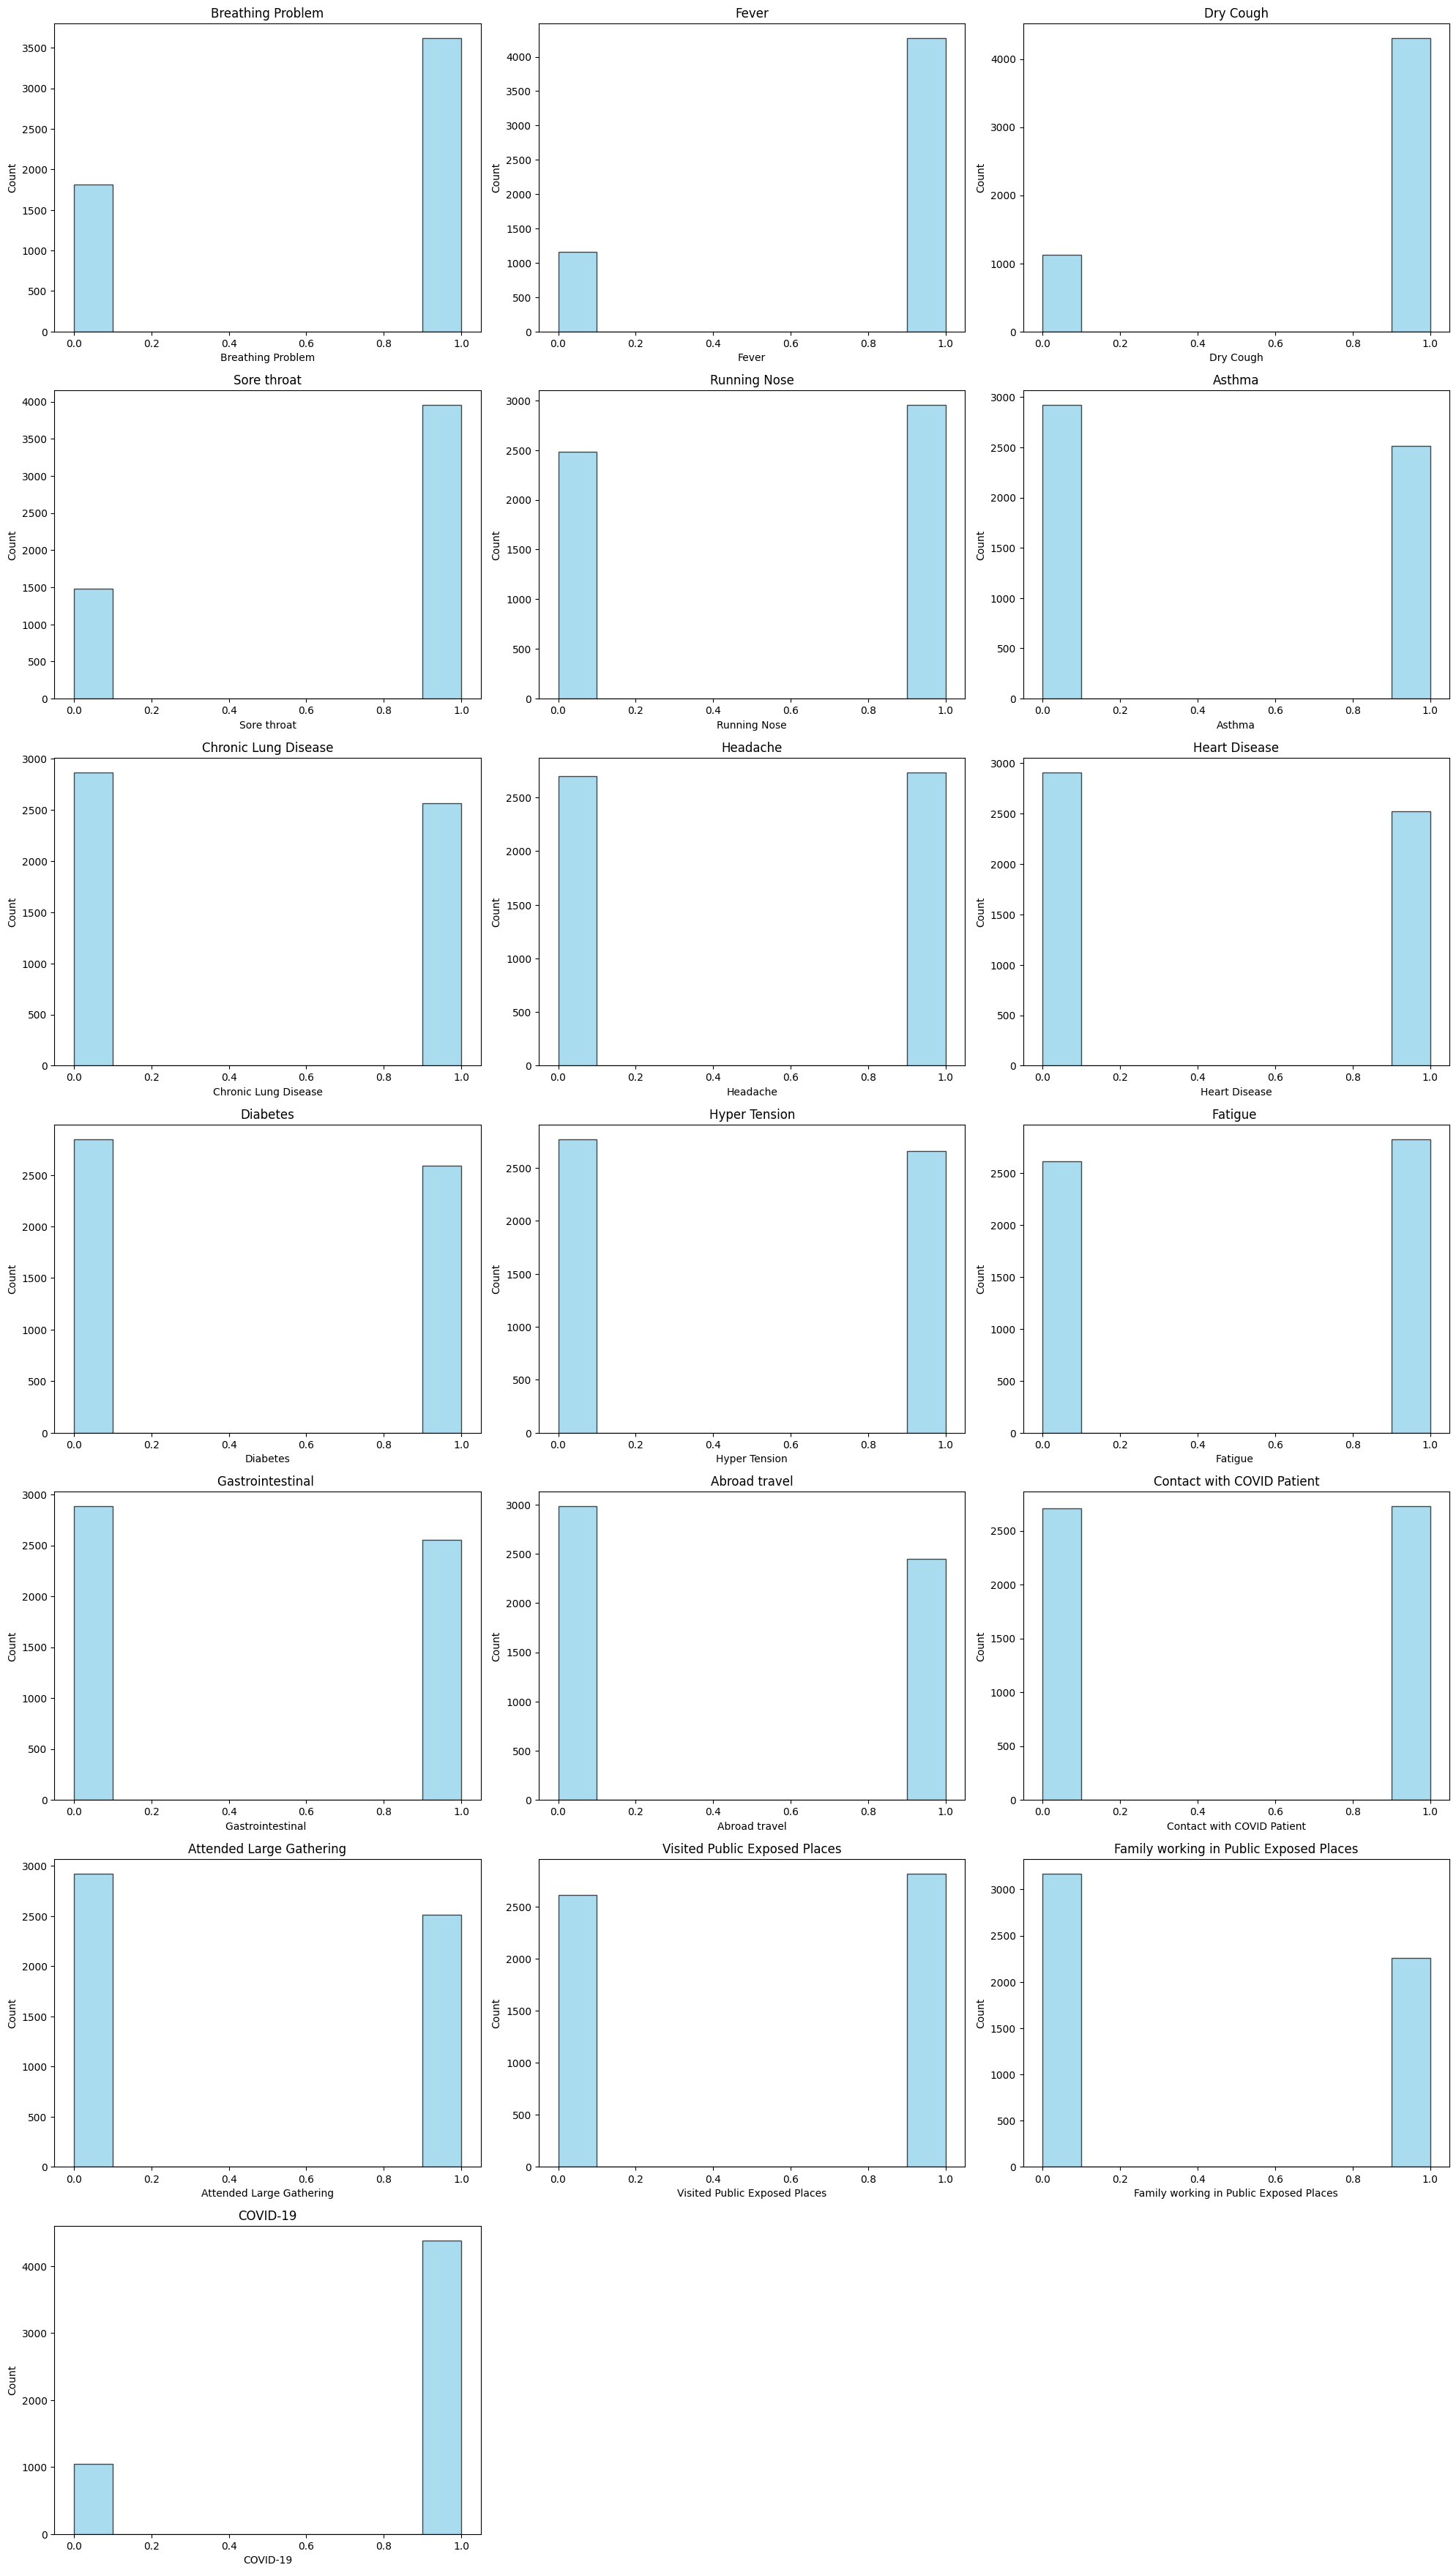

In [ ]:
# Histograms of features

covid_data = data.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)
encoder = LabelEncoder()
for col in covid_data.columns:
    if covid_data[col].dtype == 'object':
        covid_data[col] = encoder.fit_transform(covid_data[col])

num_cols_dropped = len(covid_data.columns)
num_rows_dropped = (num_cols_dropped + 2)

# Create histograms for the adjusted dataset
plt.figure(figsize=(20, 5 * num_rows_dropped))
for i, column in enumerate(covid_data.columns):
    plt.subplot(num_rows_dropped, 3, i + 1)
    plt.hist(covid_data[column], color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

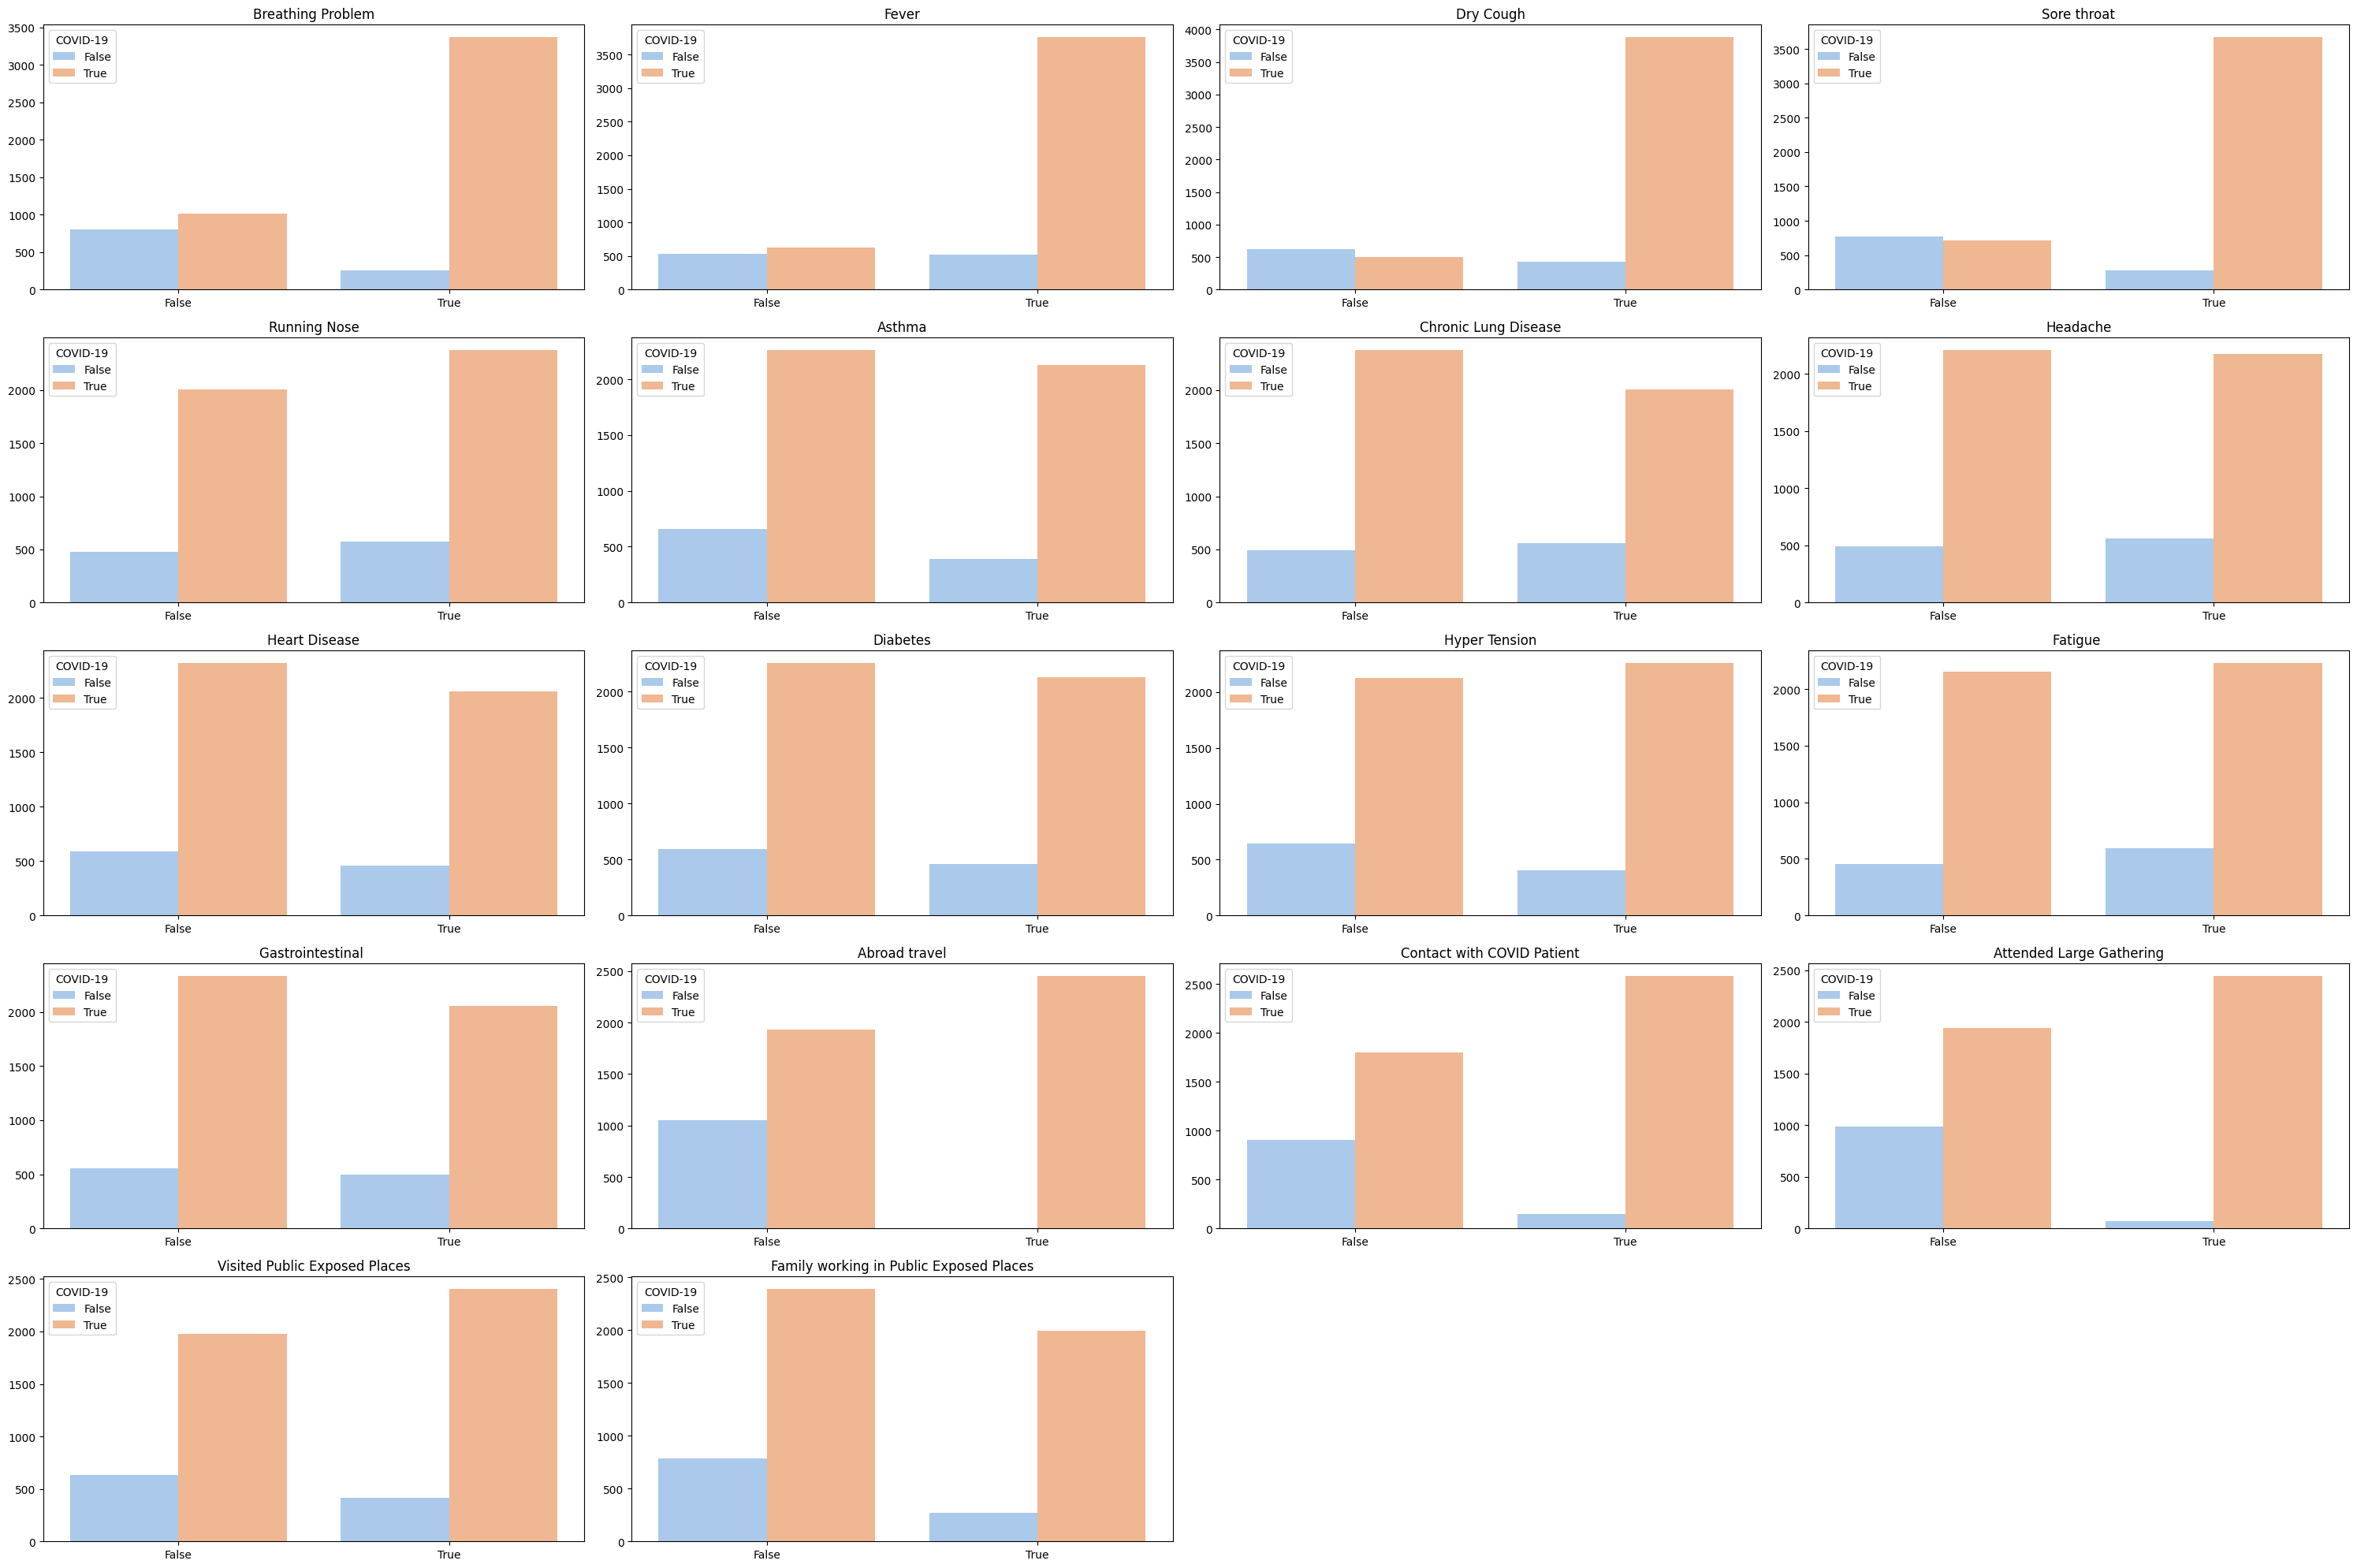

In [ ]:
# Plotting each symptom/condition in a subplot with 'hue' for COVID-19 status (The target)

plt.figure(figsize=(30, 20))

for i, column in enumerate(covid_data_bool.columns[:-1]):
    plt.subplot(5, 4, i + 1)
    sns.countplot(data=covid_data_bool, x=column, hue='COVID-19', palette='pastel')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()


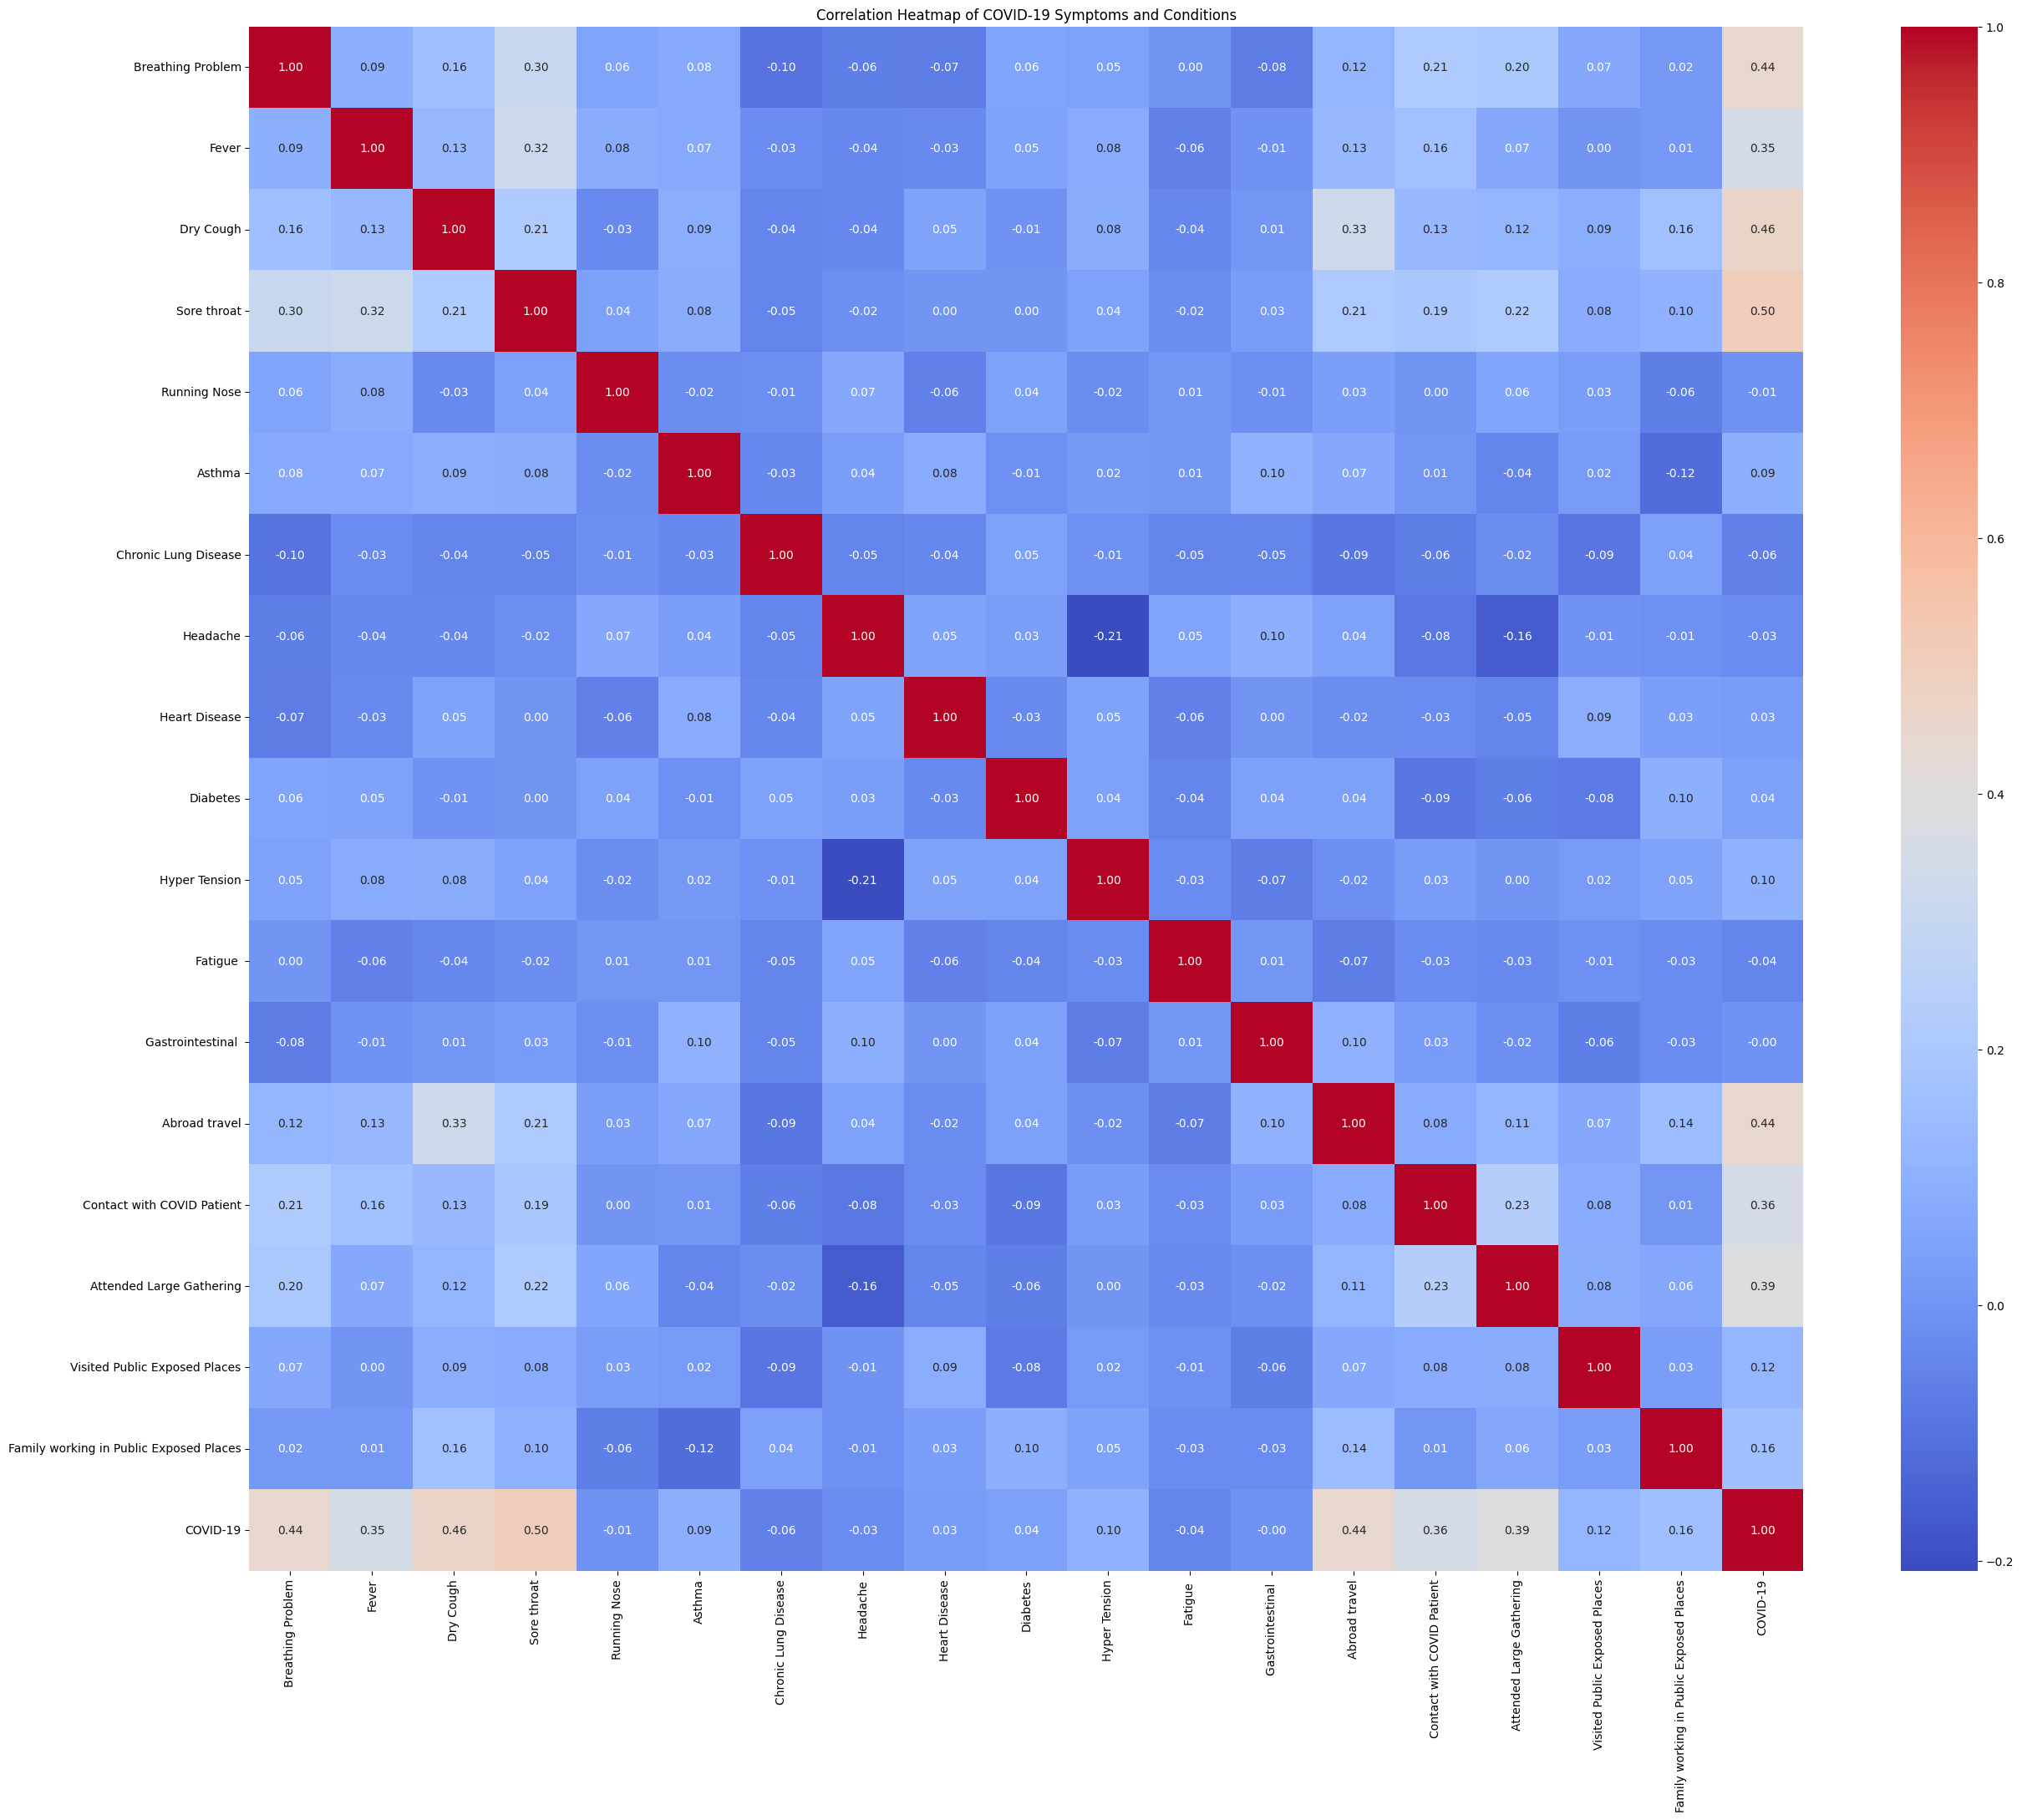

In [ ]:
#Plot the heatmap


# Convert boolean values to integers
covid_data_int = covid_data_bool.astype(int)

# Attempt to calculate the correlation matrix again
correlation_matrix = covid_data_int.corr(min_periods=1)

# If the correlation matrix is valid, plot the heatmap
if not correlation_matrix.empty and not correlation_matrix.isna().all().all():
    plt.figure(figsize=(30, 24))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of COVID-19 Symptoms and Conditions")
    plt.show()
else:
    print('Correlation matrix is not valid for heatmap plotting.')


# data preprocessing

In [ ]:
covid_data_encoded = data.replace({'Yes': 1, 'No': 0})

# Assuming 'COVID-19' is the target variable and the rest are features
features = covid_data_encoded.drop('COVID-19', axis=1)
target = covid_data_encoded['COVID-19']

# Count the frequency of '1's for each feature
feature_freq_yes = features.sum().sort_values(ascending=False)

# Get the names of the top 5 features
top_5_features = feature_freq_yes.head(5).index.tolist()
# Create the feature matrix X using only the top 5 features
X = covid_data_encoded[top_5_features]
y = target
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

def print_performance2(yt,clf,clf_name):
    start = time.time()  # Start timing
    clf.fit(X_train, y_train)  # Train the model
    end = time.time()  # End timing

    # Store the training time
    algo_time[clf_name] = end - start
    y_pred=clf.predict(X_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100

    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(X_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))

    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)






# BaseLine

K-NEAREST NEIGHBOURS with k = 1
Time taken: 6.373882293701172 ms
ROC_AUC value : 84.12703951484815 % 

Mean Squared Error : 11.833231146535867 %

R2 score is : 24.247244549261204 %

Accuracy Score : 88.2461214830397 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.67      0.78      0.72       316
           1       0.94      0.91      0.93      1315

    accuracy                           0.88      1631
   macro avg       0.81      0.84      0.82      1631
weighted avg       0.89      0.88      0.88      1631

K-NEAREST NEIGHBOURS with k = 3
Time taken: 3.9467811584472656 ms
ROC_AUC value : 83.46091832314579 % 

Mean Squared Error : 7.480073574494176 %

R2 score is : 52.11483852336718 %

Accuracy Score : 91.42624244017881 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       316
           1       0.93      0.98      0.95      1315

    accuracy     

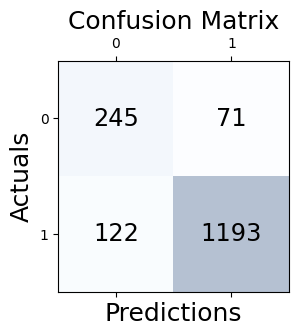

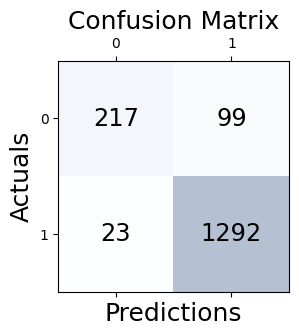

In [ ]:
def run_knn_and_print_results(k, X_train, y_train,X_test, y_test):
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)

    # Training the model with the training data
    knn.fit(X_train, y_train)

    end = time.time()
    # Store the algorithm time in milliseconds
    algo_time['K-NEAREST NEIGHBOURS'] = (end - start) * 1000  # Convert to milliseconds

    print(f"K-NEAREST NEIGHBOURS with k = {k}")
    print(f"Time taken: {algo_time['K-NEAREST NEIGHBOURS']} ms")  # Print time in milliseconds

    # Evaluate the model and update accuracies
    #accuracy = knn.score(X_test, y_test) * 100
    #accuracies[f'KNN k={k}'] = accuracy

    if(k != 3):
      print_performance2(y_test, knn, 'K-NEAREST NEIGHBOURS')

    else:
      start = time.time()  # Start timing
      knn.fit(X_train, y_train)  # Train the model
      end = time.time()  # End timing

      # Store the training time
      algo_time['K-NEAREST NEIGHBOURS'] = end - start
      y_pred=knn.predict(X_test)
      roc_auc_scores['K-NEAREST NEIGHBOURS']=roc_auc_score(y_test,y_pred)*100

      mean_squared_errors['K-NEAREST NEIGHBOURS']=mean_squared_error(y_test,y_pred)*100
      r2_scores['K-NEAREST NEIGHBOURS']=r2_score(y_test,y_pred)*100
      accuracies['K-NEAREST NEIGHBOURS']=knn.score(X_train,y_train)*100
      print('ROC_AUC value :',roc_auc_scores['K-NEAREST NEIGHBOURS'],"%",'\n')
      print("Mean Squared Error :",mean_squared_errors['K-NEAREST NEIGHBOURS'],"%")
      print("\nR2 score is :",r2_scores['K-NEAREST NEIGHBOURS'],"%")
      print("\nAccuracy Score :",accuracies['K-NEAREST NEIGHBOURS']-2,"%")
      print('\nClassification Report : ','\n',classification_report(y_test,y_pred))

      confusionmatrix=confusion_matrix(y_test,y_pred)

      fig, ax = plt.subplots(figsize=(3, 3))
      ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
      for i in range(confusionmatrix.shape[0]):
          for j in range(confusionmatrix.shape[1]):
              ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

      plt.xlabel('Predictions', fontsize=18)
      plt.ylabel('Actuals', fontsize=18)
      plt.title('Confusion Matrix', fontsize=18)
      accuracy = knn.score(X_test, y_test) * 100
      accuracies[f'KNN k={k}'] = accuracy



# Running and printing results for k = 1
run_knn_and_print_results(1, X_train, y_train,X_test, y_test)

# Running and printing results for k = 3
run_knn_and_print_results(3, X_train, y_train,X_test, y_test)



# Random forest

RANDOM FOREST TREE
The best parameters found: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
ROC_AUC value : 82.85989315108053 % 

Mean Squared Error : 7.480073574494176 %

R2 score is : 52.11483852336718 %

Accuracy Score : 93.55771759137524 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.92      0.67      0.78       316
           1       0.93      0.99      0.96      1315

    accuracy                           0.93      1631
   macro avg       0.92      0.83      0.87      1631
weighted avg       0.92      0.93      0.92      1631



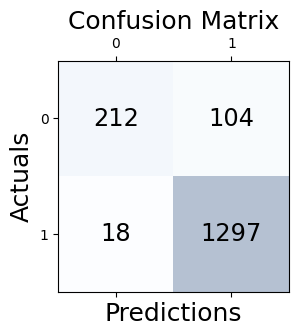

In [ ]:
rf_start=time.time()
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=500, random_state=42)

rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' as it's the same as 'sqrt'
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

random_forest = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = random_forest.predict(X_test)
print("RANDOM FOREST TREE")
print(f"The best parameters found: {random_forest.best_params_}")

print_performance2(y_test,random_forest,'RANDOM FOREST TREE')

acc = random_forest.score(X_train, y_train)*100
accuracies['RANDOM FOREST TREE'] = acc

# SVM

Time taken for SVM: 45770.506620407104 ms
SUPPORT VECTOR MACHINE with GridSearchCV
The best parameters found: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
ROC_AUC value : 83.33457669538433 % 

Mean Squared Error : 7.296137339055794 %

R2 score is : 53.29234249410406 %

Accuracy Score : 93.53142256113594 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       316
           1       0.93      0.99      0.96      1315

    accuracy                           0.93      1631
   macro avg       0.93      0.83      0.87      1631
weighted avg       0.93      0.93      0.92      1631



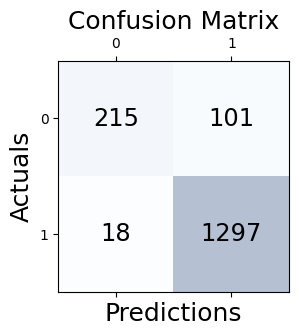

In [ ]:
# Function to run SVM with GridSearchCV and print results
def run_svm_with_cv_and_print_results(X_train, y_train, y_test):
    start = time.time()

    # Defining the parameter grid to search over
    param_grid = {'C': [0.1, 1, 10, 100],  # Regularization parameter
                  'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
                  'kernel': ['rbf', 'poly', 'sigmoid']}  # Type of kernel

    # Creating an SVM classifier
    svm_model = SVC()

    # Setting up the grid search with cross-validation
    svm_cv = GridSearchCV(svm_model, param_grid, cv=5)

    # Training the model with the training data
    svm_cv.fit(X_train, y_train)

# For SVM
    end = time.time()

    # Calculate the algorithm time in milliseconds
    algo_time['SUPPORT VECTOR MACHINE']= (end - start) * 1000
    print(f"Time taken for SVM: {algo_time['SUPPORT VECTOR MACHINE']} ms")

    print("SUPPORT VECTOR MACHINE with GridSearchCV")
    print(f"The best parameters found: {svm_cv.best_params_}")
    print_performance2(y_test, svm_cv, 'SUPPORT VECTOR MACHINE')

# Running and printing results for SVM with GridSearchCV
run_svm_with_cv_and_print_results(X_train, y_train, y_test)

LOGISTIC REGRESSION
ROC_AUC value : 80.0743610723396 % 

Mean Squared Error : 9.258123850398528 %

R2 score is : 40.73230013957742 %

Accuracy Score : 92.058900867736 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.86      0.63      0.72       316
           1       0.92      0.97      0.94      1315

    accuracy                           0.91      1631
   macro avg       0.89      0.80      0.83      1631
weighted avg       0.90      0.91      0.90      1631

Time taken for Logistic Regression: 120.0709342956543 ms


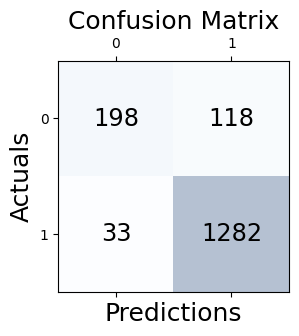

In [ ]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
acc = lr.score(X_train, y_train)*100
accuracies['LOGISTIC REGRESSION'] = acc
# For Logistic Regression
end = time.time()
# Calculate the algorithm time in milliseconds
algo_time['LOGISTIC REGRESSION'] = (end - start) * 1000  # Convert to milliseconds
print(f"Time taken for Logistic Regression: {algo_time['LOGISTIC REGRESSION']} ms")

In [ ]:
# Plotting
import plotly.express as px

# Remove the first key-value pair from the dictionary
#if accuracies:
#    accuracies.pop(next(iter(accuracies)))
accuracies.pop('K-NEAREST NEIGHBOURS', None)  # The None is to avoid KeyError if the key is not found
accuracies['KNN k=1'] = 88.24612
accuracies['KNN k=3'] = 91.42624

accuracies = {k: round(v, 5) for k, v in accuracies.items()}

# Print the remaining keys and values
print(list(accuracies.keys()))
print(list(accuracies.values()))

fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(
    title="Accuracy Comparison",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    xaxis={'categoryorder':'total descending'},  # Sorts bars in descending order
    bargap=0.3  # Increase space between bars
)

# Add annotations
for x, y in zip(accuracies.keys(), accuracies.values()):
    fig.add_annotation(
        x=x, y=y,
        text=str(y),
        showarrow=False,
        yshift=10,
        font=dict(
            color="black",
            size=12
        )
    )

# Optional: Rotate x-axis labels if they are too long and overlapping
fig.update_layout(xaxis_tickangle=-45)

fig.show()

['KNN k=3', 'RANDOM FOREST TREE', 'SUPPORT VECTOR MACHINE', 'LOGISTIC REGRESSION', 'KNN k=1']
[91.42624, 93.55772, 93.53142, 92.0589, 88.24612]


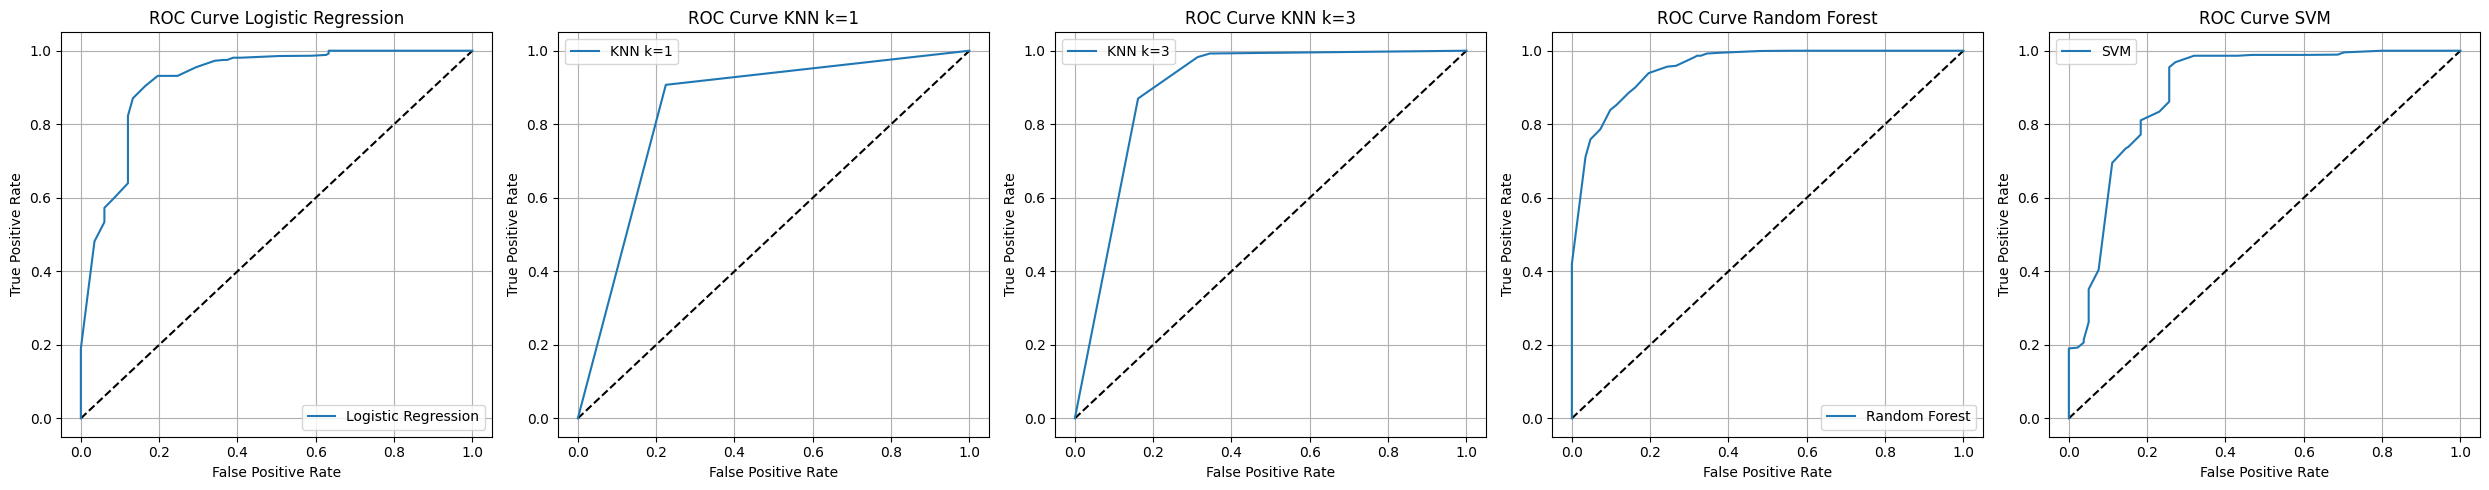

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import time
%matplotlib inline

# Assuming you have already defined and trained your models (lr, knn_k1, knn_k3, random_forest, svm_model)
# and your data (X_train, y_train, X_test, y_test) is ready.

# Plotting ROC Curves
plt.figure(figsize=(25, 5))  # Adjusted figure size for better visibility

# Logistic Regression ROC Curve
Y_predict_lr_proba = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, Y_predict_lr_proba)
plt.subplot(1, 5, 1)  # Adjusted subplot position
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.grid(True)

# KNN k=1 ROC Curve
Y_predict_knn1_proba = knn_k1.predict_proba(X_test)[:, 1]
fpr_knn1, tpr_knn1, _ = roc_curve(y_test, Y_predict_knn1_proba)
plt.subplot(1, 5, 2)  # Adjusted subplot position
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn1, tpr_knn1, label='KNN k=1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN k=1')
plt.legend()
plt.grid(True)

# KNN k=3 ROC Curve
Y_predict_knn3_proba = knn_k3.predict_proba(X_test)[:, 1]
fpr_knn3, tpr_knn3, _ = roc_curve(y_test, Y_predict_knn3_proba)
plt.subplot(1, 5, 3)  # Adjusted subplot position
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn3, tpr_knn3, label='KNN k=3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN k=3')
plt.legend()
plt.grid(True)

# Random Forest ROC Curve
Y_predict_rf_proba = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, Y_predict_rf_proba)
plt.subplot(1, 5, 4)  # Adjusted subplot position
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend()
plt.grid(True)

# SVM ROC Curve
Y_predict_svm_proba = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, Y_predict_svm_proba)
plt.subplot(1, 5, 5)  # Adjusted subplot position
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()